In [4]:
import os
import pandas as pd
os.chdir("C:/Users/18479/OneDrive/Desktop/Code Turtle Project")

In [2]:
import os
import pandas as pd

# Directory containing .si files
directory = 'Tracks'

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".si"):  # Process only .si files
        file_path = os.path.join(directory, filename)
        
        # Load the .si file into a DataFrame
        df = pd.read_csv(file_path, delim_whitespace=True,
                         names=["TrackID", "year", "month", "day", "hour", "minute", "second", "latitude", "longitude"])
        
        # Create a 'datetime' column
        df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
        
        # Calculate the time differences
        df['deltaT'] = df['datetime'].diff().dt.total_seconds().fillna(0)
        df['deltaLat'] = df['latitude'].diff().fillna(0)
        df['deltaLon'] = df['longitude'].diff().fillna(0)
        
        # Save specific columns to a new CSV
        output_file_path = os.path.join(directory, f"{os.path.splitext(filename)[0]}_cleaned.csv")
        df[['datetime', 'latitude', 'longitude', 'deltaT', 'deltaLat', 'deltaLon']].to_csv(output_file_path, index=False)
        
        print(f"Processed and saved: {output_file_path}")

C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True,
C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True,
C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True,


Processed and saved: Tracks\T53434_cleaned.csv
Processed and saved: Tracks\T53509_cleaned.csv
Processed and saved: Tracks\T57684_cleaned.csv
Processed and saved: Tracks\T66818_cleaned.csv


C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True,
C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True,
C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True,
C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df 

Processed and saved: Tracks\T66819_cleaned.csv
Processed and saved: Tracks\T66821_cleaned.csv
Processed and saved: Tracks\T66823_cleaned.csv
Processed and saved: Tracks\T66837_cleaned.csv
Processed and saved: Tracks\T66838_cleaned.csv
Processed and saved: Tracks\T66839_cleaned.csv
Processed and saved: Tracks\T66840_cleaned.csv
Processed and saved: Tracks\T66845_cleaned.csv
Processed and saved: Tracks\T66846_cleaned.csv
Processed and saved: Tracks\T84473_cleaned.csv
Processed and saved: Tracks\T84475_cleaned.csv
Processed and saved: Tracks\T84476_cleaned.csv
Processed and saved: Tracks\T84477_cleaned.csv


C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True,
C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True,
C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True,
C:\Users\18479\AppData\Local\Temp\ipykernel_17396\683779918.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df 

In [5]:
import pandas as pd
import numpy as np

def generate_scrambled_path(file_path):
    # Load the cleaned file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Starting location and time from the DataFrame
    start_lat, start_lon, start_time = df['latitude'].iloc[0], df['longitude'].iloc[0], pd.to_datetime(df['datetime'].iloc[0])

    # Shuffle delta columns as rows
    scrambled_df = df[['deltaT', 'deltaLat', 'deltaLon']].sample(frac=1, random_state=42).reset_index(drop=True)

    # Initialize lists to store path coordinates and timestamps
    lats = [start_lat]
    lons = [start_lon]
    times = [start_time]

    # Generate path using scrambled delta values
    for _, row in scrambled_df.iterrows():
        # Compute new position
        new_lat = lats[-1] + row['deltaLat']
        new_lon = lons[-1] + row['deltaLon']
        new_time = times[-1] + pd.to_timedelta(row['deltaT'], unit='s')
        
        # Append to path lists
        lats.append(new_lat)
        lons.append(new_lon)
        times.append(new_time)

    # Create new DataFrame for the path
    path_df = pd.DataFrame({
        'datetime': times[1:],  # Exclude the starting point as it's added manually
        'latitude': lats[1:], 
        'longitude': lons[1:]
    })
    
    return path_df
scrambled_path_df = generate_scrambled_path('Tracks/T53434_cleaned.csv')
print(scrambled_path_df.head())

             datetime  latitude  longitude
0 2011-09-15 10:34:19 -21.16832   55.25552
1 2011-09-15 16:07:59 -21.11539   55.27348
2 2011-09-15 21:03:27 -21.12575   55.24560
3 2011-09-15 21:29:02 -21.12184   55.24434
4 2011-09-15 22:56:59 -21.12415   55.22495


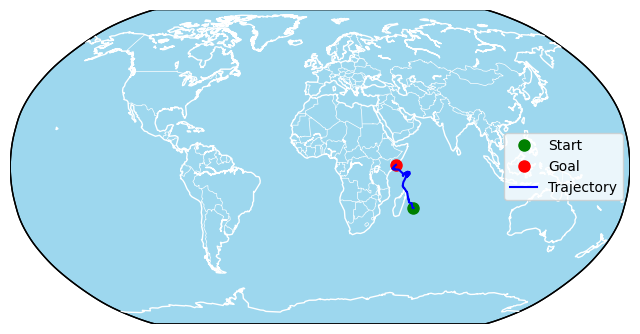

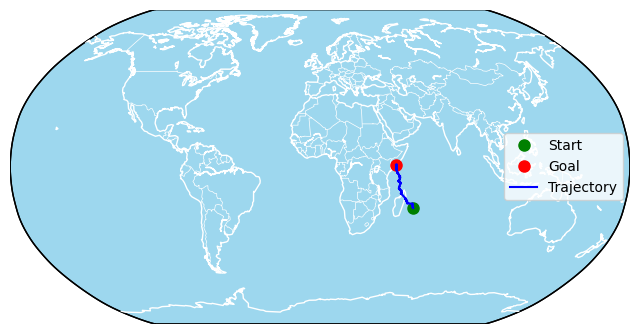

In [6]:
import AxesmMagneticMap as axesmap
import pickle
with open('magmodel.pkl', 'rb') as file:
    magmodel = pickle.load(file)
df = pd.read_csv('Tracks/T66846_cleaned.csv')
scrambled_path_df = generate_scrambled_path('Tracks/T66846_cleaned.csv')
map = axesmap.AxesmMagneticMap(magmodel)
map.initialize_axes(surfmesh=None)
map.update_agent_start(df.loc[1,"latitude"],df.loc[1,"longitude"])  
end = df.index[-1]
map.update_agent_goal(df.loc[end,"latitude"],df.loc[end,"longitude"])  
map.update_agent_trajectory(df["latitude"],df["longitude"])
map.show()
map2 = axesmap.AxesmMagneticMap(magmodel)
map2.initialize_axes(surfmesh=None)
map2.update_agent_start(scrambled_path_df.loc[1,"latitude"],scrambled_path_df.loc[1,"longitude"])  
end = scrambled_path_df.index[-1]
map2.update_agent_goal(scrambled_path_df.loc[end,"latitude"],scrambled_path_df.loc[end,"longitude"])  
map2.update_agent_trajectory(scrambled_path_df["latitude"],scrambled_path_df["longitude"])
map2.show()
